In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [4]:
EXCEL_PATH = "data/data_sample.xlsx"
EXCEL_SHEET = "Sheet1"

def getDf():
    df_raw = pd.read_excel(EXCEL_PATH, EXCEL_SHEET)
    return df_raw.loc[df_raw["success"] >= 1]
df = getDf()
print(df)

     dist   omega  theta  success  fail  accuracy
1   300.0  3100.0   55.0      2.0  17.0  0.105263
2   260.0  3000.0   55.0      2.0   9.0  0.181818
3   260.0  2900.0   55.0      5.0   7.0  0.416667
4   210.0  2700.0   55.0      9.0  13.0  0.409091
5   165.0  2500.0   55.0      9.0  18.0  0.333333
6   110.0  2500.0   65.0      1.0   6.0  0.142857
8   110.0  2650.0   65.0      2.0   7.0  0.222222
11  110.0  2400.0   65.0      2.0   8.0  0.200000
12  110.0  2450.0   65.0      1.0   9.0  0.100000
13  110.0  2550.0   70.0      6.0  11.0  0.352941
14  110.0  2470.0   65.0      6.0  10.0  0.375000


In [ ]:
# y2 parameter yang dipisah ke beberapa graph
def plotGraph(x, y1, y2):
    df = getDf()
    y2s = df[y2].unique()
    y2s_len = len(y2s)
    fig, axes = plt.subplots(nrows=y2s_len, figsize=(10,7))
    for i in range(0, y2s_len):
        df_y2 = df.loc[df[y2] == y2s[i]]
        df_y2.plot(ax=axes[i], kind="scatter", x=x, y=y1)
        model = np.poly1d(np.polyfit(df_y2["dist"], df_y2[y1], 20))
        polyline = np.linspace(df_y2[x].min(), df_y2[x].max())
        axes[i].plot(polyline, model(polyline), color="red", lw=3)
        axes[i].set_title("rpm = "+str(y2s[i]))
plotGraph("dist", "omega", "theta")

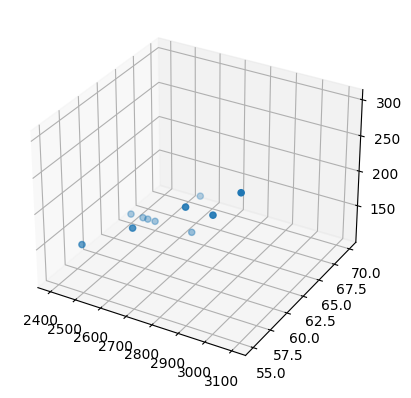

In [5]:
ax = plt.axes(projection='3d')
ax.scatter3D(df["omega"], df["theta"], df["dist"])